As an NLP engineer, you have been tasked with creating a news article summarization model. However, only 5% of the collected news articles have annotated summaries, which presents a challenge in training the model. To address this, you may need to explore alternative approaches. With careful consideration and advanced NLP techniques, you can create a robust and accurate model that effectively summarizes news articles into brief and informative summaries!

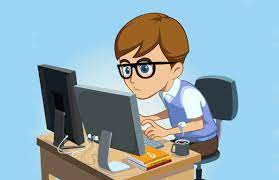

# HW4_2020147565_박영한

You have until 05/09/2023 to try out your own method(s) to improve the performance of the model, and submit a report (max 4 pages, use pdf format) and source code. The report should include a description of the method(s) you used, the results achieved in terms of Rouge score compared to the baseline, and an analysis of the factors that contributed to the improvement. 

Please note that plagiarism will not be tolerated, and if detected, will result in a score of -400. 

**You are not allowed to use any of the labels that have been explicitly excluded from the training data.**



Here are some possible methods you can try:

1. Hyperparameter Tuning: You can adjust the hyperparameters of the model, such as the learning rate, batch size, and number of epochs, to find the optimal settings for the task. You can use a validation set to evaluate the performance of the model and choose the best hyperparameters.

2. Data Augmentation with KeyBERT: You can use KeyBERT to extract additional keywords from the dataset and use them to augment the training data. This can potentially improve the performance of the model by providing more diverse and informative input.

3. Knowledge Distillation with LLMs: You can use knowledge distillation techniques, such as training a smaller model to mimic the output of a larger, pre-trained language model, to transfer knowledge from a larger model to a smaller model. This can help the smaller model achieve higher performance.

4. Multi-Task Learning: You can train the model on multiple related tasks simultaneously, such as summarization and title generation, to improve its overall performance and generalization ability.

5. Add other existing dataset: You can consider adding other existing datasets to the training data to increase the diversity of the data and improve the generalization ability of the model. This can help the model learn patterns and relationships that may not be present in the current dataset alone.

After trying out your method(s), compare the performance of the model with the baseline in terms of Rouge score. Then, provide a detailed analysis of the results and explain why your method(s) work.

You will be graded on the following criteria:

- Performance improvement(20 points): Your method(s) should improve the performance of the model in terms of Rouge-2 score compared to the baseline. The higher the improvement, the better the score. The maximum score for Rouge-2 is 19 points. Your score will be calculated using the following formula:

$10 + \frac{(yourscore-16)}{(19-16)}*10$

- Soundness of approach (30 points): Your method(s) should be based on sound principles and supported by relevant literature. You should explain the rationale behind your approach and why you think it should work.

- Analysis and interpretation (20 points): You should provide a detailed analysis of the results and explain why your method(s) work. You should consider factors such as the quality of the added data, the effectiveness of the hyperparameters, and the relevance of the additional tasks. Your analysis should demonstrate a deep understanding of the underlying mechanisms of the model and the effects of your method(s) on its performance.

- Clarity of report (30 points): Your report should be well-organized, clearly written, and easy to follow. Your analysis should be supported by relevant figures, tables, and examples. 

## Preparation

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
os.chdir('drive/MyDrive/연세대학교 2학년 2학기 (2023-1)/CSI4121 Big Data/HW4')

Mounted at /content/drive


In [3]:
! pip install transformers==4.26.1 evaluate datasets wandb rouge_score keybert -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 81.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from datasets import load_dataset
import random
import json
# Import required libraries and set random seed for reproducibility.

random.seed(0)

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Prepare dataset
- For our experiment, we will use the CNN/DM dataset.
- Due to data scarcity, we assume that we only have access to 5% of the full CNN/DM dataset.
- 회사에 들어갔는데 보안 이슈로 데이터를 조금밖에 사용하지 못하는 상황 가정

### Download CNN/DM Dataset

In [13]:
# 뉴스 summarization 데이터셋

# Define the split names and load the CNN/Daily Mail dataset from Hugging Face Datasets library version 3.0.0.
split = ["train","validation","test"]
cnndm = load_dataset("cnn_dailymail", "3.0.0")  # 뒤는 데이터셋 버전

# For each of the train, validation, and test splits, randomly sample 5% of the examples and save them to a new JSON file.
for spl in split:
    total_num_examples = len(cnndm[spl])
    number_of_sampled_examples = int(total_num_examples*0.05)
    sampled_examples = random.sample(list(cnndm[spl]),number_of_sampled_examples)
    
    # Save the sampled examples to a JSON file with the same name as the split.
    with open(f"{spl}.json", "w") as f:
        to_be_saved = [{k:v for k,v in example.items()} for example in sampled_examples]
        json.dump(to_be_saved, f, indent=4)


Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

### Make New Summaries for BBC Dataset

bbc.json은 http://mlg.ucd.ie/datasets/bbc.html 을 전처리 해둔 파일입니다~

In [ ]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
import json
from torch.utils.data import DataLoader

with open('bbc.json', 'r') as f:
  bbc = json.load(f)

# Set up tokenizer and model
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small"
).to("cuda")

# Define input and output prefixes
input_prefix = "summarize: "

# Define the list of strings to summarize
input_strings = [obj['highlights'] for obj in bbc]
input_ids = [tokenizer.encode(input_prefix + input_string, return_tensors="pt").squeeze(0) for input_string in input_strings]
input_ids = torch.nn.utils.rnn.pad_sequence(input_ids, batch_first=True, padding_value=tokenizer.pad_token_id).to("cuda")

batch_size = 8
dataloader = DataLoader(input_ids, batch_size=batch_size)

results = []
# Generate summaries for each input string
for batch in dataloader:
    # Generate the summary
    summary_ids = model.generate(batch, max_length=100, num_beams=4, early_stopping=True)

    # Decode the summary and print it
    summaries = [tokenizer.decode(summary_id, skip_special_tokens=True) for summary_id in summary_ids]
    results.extend(summaries)

In [ ]:
for i in range(len(bbc)):
  bbc[i]['highlights'] = results[i]

with open('bbc_processed.json', 'w') as f:
  json.dump(bbc, f)

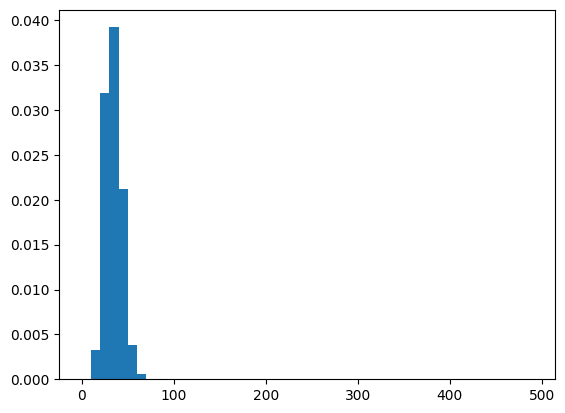

In [ ]:
with open('bbc_processed.json', 'r') as f:
  bbcp = json.load(f)

summ_len = [len(obj['highlights'].replace('\n', ' ').split()) for obj in bbcp]


import matplotlib.pyplot as plt

plt.hist(summ_len, bins=range(0, 500, 10), density=True)

plt.show()

### Append to Original Dataset

In [14]:
import json
with open('train.json', 'r') as f:
  train = json.load(f)
with open('bbc_processed.json', 'r') as f:
  bbc = json.load(f)

train += bbc

with open('train.json', 'w') as f:
  json.dump(train, f)

## Pre-finetuning with Keyword Prediction
In this section of the code, we aim to augment our dataset with keyword predictions using the KeyBERT model. To achieve this, we iterate over each split in the dataset and load the corresponding JSON file containing a list of example articles and summaries.

For each batch of examples, we extract keywords from the summary using the KeyBERT model, and add the top predicted keywords to the corresponding example in the dataset. We use a batch size of 256 and a keyphrase ngram range of (3,4) to balance accuracy and speed.
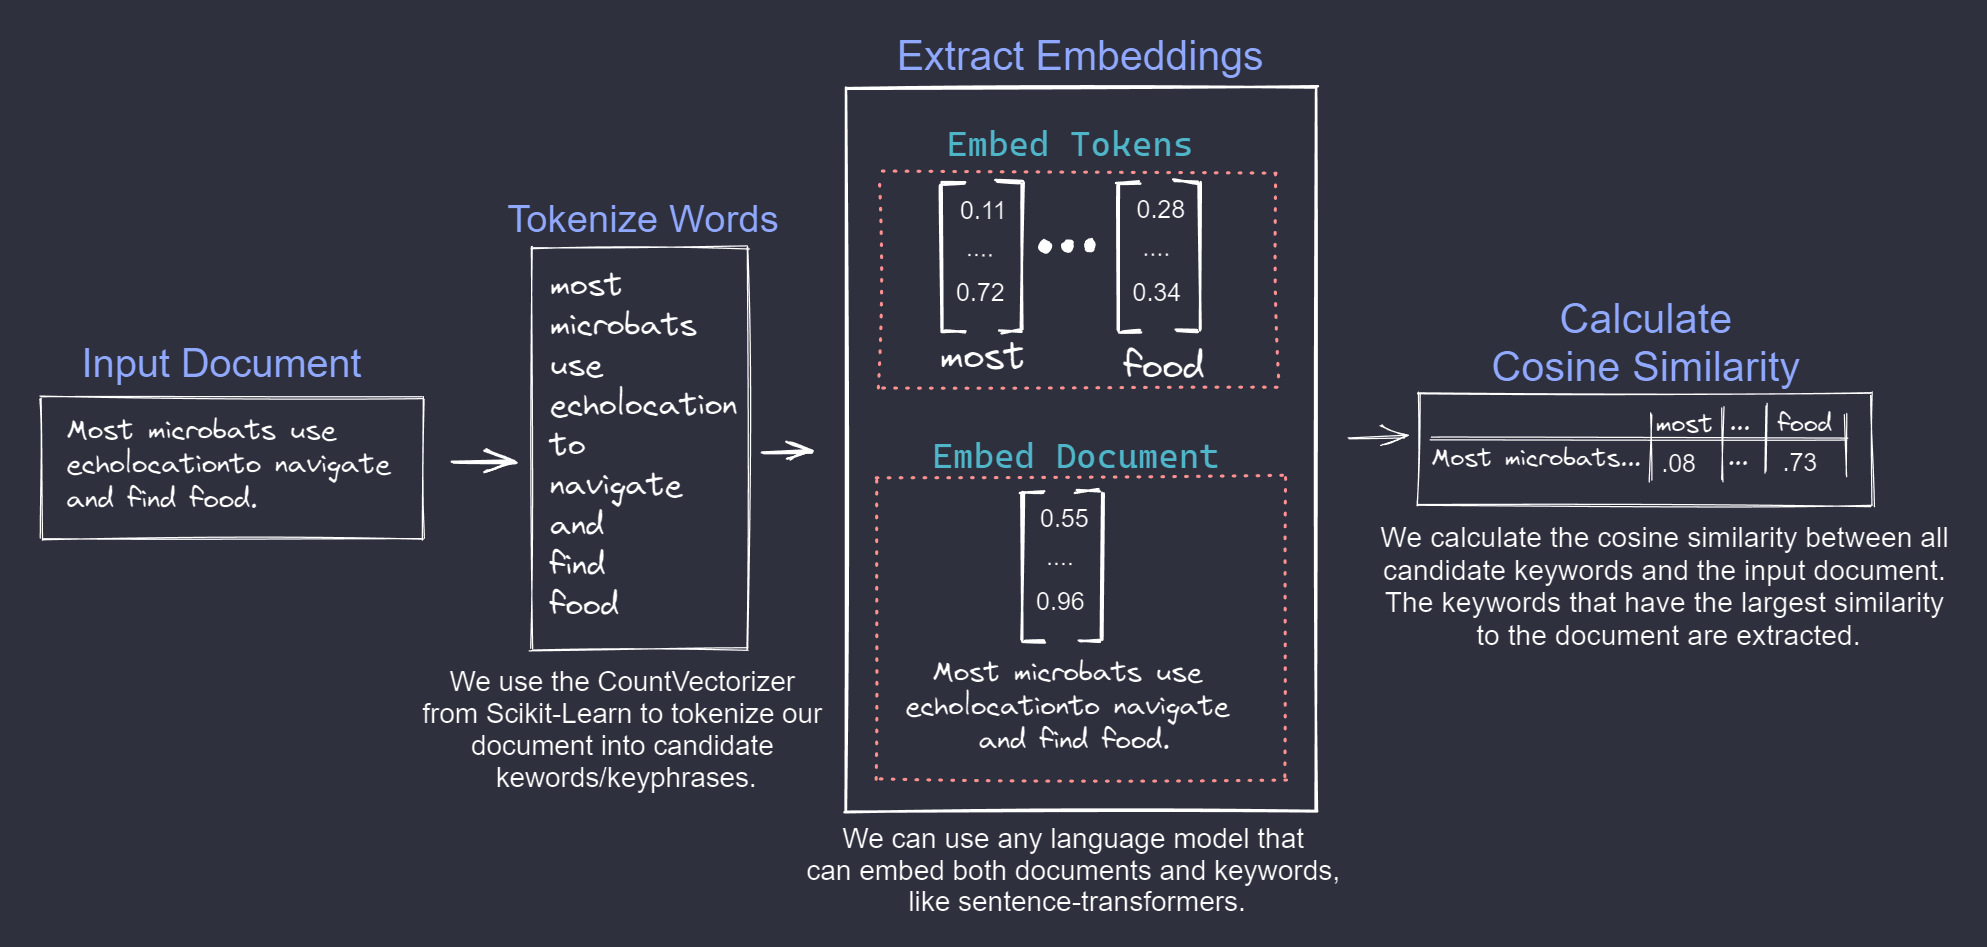

Overall, this process helps us to generate additional training data that includes informative and relevant keywords for our finetuning task, potentially improving the performance of our model.

### Load libraries

In [6]:
from transformers import AutoTokenizer
import datasets
from transformers import AutoConfig, AutoModelForSeq2SeqLM 
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer
from datasets import load_metric
import json
from nltk import word_tokenize
import numpy as np
import torch
import wandb
import argparse

In [16]:
# Import required libraries
from keybert import KeyBERT
import json
from tqdm import tqdm

# Define the splits and batch size, and initialize the KeyBERT model.
splits = ['train', 'validation', 'test']
batch_size = 256
kw_model = KeyBERT()

# For each split in the dataset, load the corresponding JSON file and add keywords to each example.
for spl in splits:
    with open(f"{spl}.json","r") as f:
        dataset = json.load(f)
    
    # Iterate over batches of examples and extract keywords using the KeyBERT model.
    for d_i in tqdm(range(0, len(dataset), batch_size)):
        cur_articles = [d['highlights'] for d in dataset[d_i:min(len(dataset), d_i+batch_size)]]
        keywords = kw_model.extract_keywords(cur_articles, keyphrase_ngram_range=(3,4), stop_words=None, use_mmr=True, diversity=0.5)
        
        # Add the extracted keywords to the corresponding example in the dataset.
        for a_i in range(0, len(cur_articles)):
            dataset[d_i+a_i]['keywords'] = [k[0] for k in keywords[a_i]]
    
    # Print the number of examples in the dataset and the number of examples with keywords added.
    print(len(dataset))
    print(sum(["keywords" in d.keys() for d in dataset]))
    
    # Save the modified dataset to a new JSON file.
    with open(f"{spl}_with_keyword.json", "w") as f:
        json.dump(dataset, f, indent=4)


loading configuration file /root/.cache/torch/sentence_transformers/sentence-transformers_all-MiniLM-L6-v2/config.json
Model config BertConfig {
  "_name_or_path": "/root/.cache/torch/sentence_transformers/sentence-transformers_all-MiniLM-L6-v2/",
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file /root/.cache/torch/sentence_transformers/sentence-transformers_all-MiniLM-L6-v2/pytorch_model.bin
All model checkpoint weights were used when i

16579
16579


100%|██████████| 3/3 [00:29<00:00,  9.78s/it]


668
668


100%|██████████| 3/3 [00:22<00:00,  7.37s/it]

574
574


### Redefine the Dataset class
- Note that `self.targets` should be lists of keywords when `use_keyword_as_target` is True.

In [7]:
class CNNDMDataset(torch.utils.data.Dataset):
    def __init__(self, examples, tokenizer, source_max_length=1024, target_max_length=128, use_keyword_as_target=False):
        self.tokenizer = tokenizer
        self.source_max_length = source_max_length
        self.target_max_length = target_max_length
        
        self.inputs = [ex["article"].replace("\n", "") for ex in examples]
        if use_keyword_as_target:
            self.targets = [",".join(ex['keywords']) for ex in examples]
        else:
            self.targets = [ex["highlights"].replace("\n", "") for ex in examples]
        
    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        item = self.tokenizer(self.inputs[idx], max_length=self.source_max_length, padding="max_length", return_tensors="pt", truncation=True)
        model_input = {k:v.squeeze(0) for k,v in item.items()}
        encoded_target = self.tokenizer(self.targets[idx], max_length=self.target_max_length, padding="max_length", return_tensors="pt", truncation=True)
        model_input['labels'] = encoded_target["input_ids"].squeeze(0)
        
        return model_input
        

### Run pre-finetune with keyword prediction

In [8]:
# tokenizer의 기능
# 1. string to sequence of int
# 2. sequence of int to string

def compute_metrics(eval_pred):
    bleu = load_metric("bleu")  # 그냥 다양성 위해서 metric 두개 써봄 ㅋ
    rouge = load_metric("rouge")  # summarization에서는 보통 얘를 젤 많이 씀
    # summarization의 정답이라는것도 애매하고 따라서 metric도 애매할 수밖에.
    # -> neural net 기반의 bert score라는 metric도 나왔고 label이 여러개인 데이터셋도 나옴
    # 이런 고찰을 보고서에 담던가 ㅋ.
    # rouge랑 bert score 조합을 젤 마니 쓴다.
    # 또 그냥 쌩 loss를 쓰기도 한다.
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them.
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    
    pred_string = decoded_preds
    label_string = decoded_labels
    # Rouge expects a newline after each sentence
    decoded_preds = [word_tokenize(pred) for pred in decoded_preds]
    decoded_labels = [[word_tokenize(label)] for label in decoded_labels]
    
    bleu_result = bleu.compute(predictions=decoded_preds, references=decoded_labels)
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    
    results = {"BLEU4": bleu_result['bleu']}
    for k, v in rouge_result.items():
        results[k] = v.mid.fmeasure
    
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    results["gen_len"] = np.mean(prediction_lens)
    return {k: round(v, 4) for k, v in results.items()}

In [9]:
# bart는 인코더로 bert 쓰고 디코더로 gpt 쓰는 모델
# bert는 인코더만 있는거라 classification 에만 쓸수 있지만
# bart는 classification 도 가능하고 seq2seq도 가능

epoch = 3
train_batch_size = 32
val_batch_size = 32
model_name = "facebook/bart-base"
init_lr = 3e-5
encoder_max_len = 1024
decoder_max_len = 100

In [ ]:
model_name = "facebook/bart-base"
finetune_weight_path = "prefinetuned_checkpoint_fin"
best_finetune_weight_path = "best_prefinetuned_checkpoint_fin"
epoch = 3

finetune_model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained(model_name)
finetune_model.gradient_checkpointing_enable()
finetune_model = finetune_model.to(device)

finetune_args = Seq2SeqTrainingArguments(
    output_dir = finetune_weight_path,
    overwrite_output_dir = True,
    do_train=True,
    do_eval=True,
    do_predict=True,
    evaluation_strategy='steps',
    logging_strategy="steps",
    save_strategy= "steps",
    save_steps=200,
    eval_steps=200,
    logging_steps=20,
    per_device_train_batch_size = train_batch_size,
    per_device_eval_batch_size = val_batch_size,
    learning_rate=init_lr,
    num_train_epochs=epoch,
    max_grad_norm=0.1,
    gradient_accumulation_steps=2,
    gradient_checkpointing=True,
    fp16=True,
    seed = 516,
    logging_first_step=True,
    load_best_model_at_end=True,
    predict_with_generate=True,
    prediction_loss_only=False,
    generation_max_length=100,
    generation_num_beams=5,
    metric_for_best_model='loss',
    greater_is_better=False,
    report_to = 'wandb',
)

cnndm = {}
splits = ["train", "validation", "test"]
for spl in splits:
    with open(f"{spl}_with_keyword.json", "r") as f:
        cnndm[spl] = json.load(f)
        
train_dataset = CNNDMDataset(cnndm['train'], tokenizer, use_keyword_as_target=True)
eval_dataset = CNNDMDataset(cnndm['validation'], tokenizer, use_keyword_as_target=True)
test_dataset = CNNDMDataset(cnndm['test'], tokenizer, use_keyword_as_target=True)

finetune_trainer = Seq2SeqTrainer(
    model = finetune_model,
    args = finetune_args,
    train_dataset = train_dataset,
    eval_dataset = eval_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics
)

wandb.init()
wandb.run.name = "final"
finetune_trainer.train()

finetune_trainer.save_model(best_finetune_weight_path)


Using cuda_amp half precision backend


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 16579
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 2
  Total optimization steps = 777
  Number of trainable parameters = 139420416
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"
You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss,Bleu4,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
200,0.846200,0.758895,0.052900,0.260100,0.086400,0.206600,0.206700,29.880200
400,0.725700,0.694856,0.060700,0.271200,0.087300,0.211100,0.211100,31.651200
600,0.690100,0.680380,0.063900,0.281200,0.092400,0.218100,0.218300,31.419200


***** Running Evaluation *****
  Num examples = 668
  Batch size = 32
Generate config GenerationConfig {
  "bos_token_id": 0,
  "decoder_start_token_id": 2,
  "early_stopping": true,
  "eos_token_id": 2,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "no_repeat_ngram_size": 3,
  "num_beams": 4,
  "pad_token_id": 1,
  "transformers_version": "4.26.1"
}

Generate config GenerationConfig {
  "bos_token_id": 0,
  "decoder_start_token_id": 2,
  "early_stopping": true,
  "eos_token_id": 2,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "no_repeat_ngram_size": 3,
  "num_beams": 4,
  "pad_token_id": 1,
  "transformers_version": "4.26.1"
}

Generate config GenerationConfig {
  "bos_token_id": 0,
  "decoder_start_token_id": 2,
  "early_stopping": true,
  "eos_token_id": 2,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "no_repeat_ngram_size": 3,
  "num_beams": 4,
  "pad_token_id": 1,
  "transformers_version": "4.26.1"
}

Generate config GenerationConfig {
  "bos_

Saving model checkpoint to prefinetuned_checkpoint_fin/checkpoint-200
Configuration saved in prefinetuned_checkpoint_fin/checkpoint-200/config.json
Configuration saved in prefinetuned_checkpoint_fin/checkpoint-200/generation_config.json
Model weights saved in prefinetuned_checkpoint_fin/checkpoint-200/pytorch_model.bin
tokenizer config file saved in prefinetuned_checkpoint_fin/checkpoint-200/tokenizer_config.json
Special tokens file saved in prefinetuned_checkpoint_fin/checkpoint-200/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 668
  Batch size = 32
Generate config GenerationConfig {
  "bos_token_id": 0,
  "decoder_start_token_id": 2,
  "early_stopping": true,
  "eos_token_id": 2,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "no_repeat_ngram_size": 3,
  "num_beams": 4,
  "pad_token_id": 1,
  "transformers_version": "4.26.1"
}

Generate config GenerationConfig {
  "bos_token_id": 0,
  "decoder_start_token_id": 2,
  "early_stopping": true,
  "eos_t

## Fine-tune on CNN/DM

In [ ]:
# HOMEWORK
finetune_weight_path = "finetuned_checkpoint_fin"
best_finetune_weight_path = "best_finetuned_checkpoint_fin"
epoch = 3

finetune_model = AutoModelForSeq2SeqLM.from_pretrained("best_prefinetuned_checkpoint_fin")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained("best_prefinetuned_checkpoint_fin")
finetune_model.gradient_checkpointing_enable()
finetune_model = finetune_model.to(device)

finetune_args = Seq2SeqTrainingArguments(
    output_dir = finetune_weight_path,
    overwrite_output_dir = True,
    do_train=True,
    do_eval=True,
    do_predict=True,
    evaluation_strategy='steps',
    logging_strategy="steps",
    save_strategy= "steps",
    save_steps=200,
    eval_steps=200,
    logging_steps=20,
    per_device_train_batch_size = train_batch_size,
    per_device_eval_batch_size = val_batch_size,
    learning_rate=init_lr,
    num_train_epochs=epoch,
    max_grad_norm=0.1,
    gradient_accumulation_steps=2,
    gradient_checkpointing=True,
    fp16=True,
    seed = 516,
    logging_first_step=True,
    load_best_model_at_end=True,
    predict_with_generate=True,
    prediction_loss_only=False,
    generation_max_length=100,
    generation_num_beams=5,
    metric_for_best_model='loss',
    greater_is_better=False,
    report_to = 'wandb',
    resume_from_checkpoint="best_prefinetuned_checkpoint"
)

cnndm = {}
splits = ["train", "validation", "test"]
for spl in splits:
    with open(f"{spl}_with_keyword.json", "r") as f:
        cnndm[spl] = json.load(f)

train_dataset = CNNDMDataset(cnndm['train'], tokenizer, use_keyword_as_target=False)
eval_dataset = CNNDMDataset(cnndm['validation'], tokenizer, use_keyword_as_target=False)
test_dataset = CNNDMDataset(cnndm['test'], tokenizer, use_keyword_as_target=False)

finetune_trainer = Seq2SeqTrainer(
    model = finetune_model,
    args = finetune_args,
    train_dataset = train_dataset,
    eval_dataset = eval_dataset,
    tokenizer = tokenizer,
    compute_metrics=compute_metrics,
)

wandb.init()
wandb.run.name = "fffffinal"
finetune_trainer.train()

finetune_trainer.save_model(best_finetune_weight_path)

## Automatic evaluation with ROUGE and BLEU score

In [ ]:
import evaluate
from torch.utils.data import DataLoader
from tqdm import tqdm

device = "cuda"
checkpoint_path = "best_finetuned_checkpoint_fin"
batch_size = 32
model_name = "facebook/bart-base"
tokenizer = AutoTokenizer.from_pretrained(checkpoint_path)
finetuned_model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint_path)

with open("test.json", "r") as f:
    test_data = json.load(f)

    
finetuned_model.eval()
finetuned_model.to(device)
test_dataset = CNNDMDataset(
            test_data,
            tokenizer=tokenizer,
            )
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
rouge = evaluate.load('rouge')
rouge_epoch = evaluate.load('rouge')
bleu_epoch = [evaluate.load('bleu') for _ in range(4)] # for BLEU 1 to 4
collection = []

# Use the trained model to generate predictions on the test data, and evaluate the predictions using ROUGE and BLEU metrics.
# Loop through each batch in the test dataloader, decode the input_ids and labels using the tokenizer, and generate a response using the finetuned model.

with torch.no_grad():
    for bi, b in enumerate(tqdm(test_dataloader)):
        cur_example = b
        
        # Get input_ids and attention_mask for the current batch, and use the finetuned model to generate a response.
        input_ids = cur_example["input_ids"].to(device)
        attention_mask = cur_example["attention_mask"].to(device)
        response = finetuned_model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_length=100,
            num_beams=7
        ).cpu()
        
        # Decode input_ids, labels, and response using the tokenizer.
        article =  tokenizer.batch_decode(cur_example["input_ids"], skip_special_tokens=True)
        label = tokenizer.batch_decode(cur_example["labels"], skip_special_tokens=True)
        pred = tokenizer.batch_decode(response, skip_special_tokens=True)
        
        # Calculate the ROUGE score for the batch and add it to the total score for the epoch.
        score = rouge.compute(references=label, predictions=pred, use_aggregator=False)
        rouge_epoch.add_batch(references=label, predictions=pred)
        
        # Calculate the BLEU score for each value of n, and add it to the total score for the epoch.
        for bi in range(4):
            bleu_epoch[bi].add_batch(references=label, predictions=pred)
            
        # Add each article, prediction, and label to a collection list for later analysis.
        for i in range(len(article)):
            collection.append({
                "article": article[i],
                "prediction": pred[i],
                "label": label[i]
            })


total_rouge_score = rouge_epoch.compute()
total_bleu_score = [bleu_epoch[bi].compute(max_order=bi+1) for bi in range(len(bleu_epoch))]

with open(f"{checkpoint_path}/predictions.json","w") as f:
    json.dump(collection, f, indent=4)

print(total_rouge_score)
with open(f"{checkpoint_path}/metrics.txt", "w") as f:
    for i in range(len(bleu_epoch)):
                f.write(f"BLEU{i+1}: {total_bleu_score[i]['bleu']}\n")
    for k,v in total_rouge_score.items():
        f.write(f"{k}: {float(v)}\n")
        
    f.write("\n\n")
 
